# MINIPRYECTO 2 SEÑALES III

---

**Julian Andres Zapata Díaz**

**Juan Daniel Gonzalez puerta**

*Universidad de Antioquia*

2020

# Modelos de Variable Latente y Clasificadores Lineales para el Reconocimiento de Rasgos

Sea un data set $\bf{X}\in \mathbb{R}^{N\times D}$

Y una matriz de etiquetas con notación 1 de K: $\bf{T}\in \mathbb{Z}^{N\times K}$

In [1]:
#importamos todas las librerias necesarias

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import scipy.io as sc
import pickle
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from google.colab import drive
import collections
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people


In [2]:
#cargamos nuestra base de datos


#cargar los archivos Julian y Santiago

'''
dataset = pd.read_pickle('./featcomplete.pkl') 
'''

#cargar los archivos Daniel

drive.mount('/content/drive') #montar el drive
ruta = '/content/drive/My Drive/Datos_señalesIIi/' #ruta de la base de datos
fileName = 'featcomplete.pkl' #nombre de la base de datos de todos los sujetos 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset = pd.read_pickle(ruta+fileName) #cargar el archivo

Etiquetas = dataset['EMOCIÓN'] #etiquetas
Etiquetas = np.array(Etiquetas.values) #extracion del valor de las etiquetas

X =  dataset.drop(['EMOCIÓN'],axis=1) #datos
X = X.values #extracion del valor de los datos

X = scale(X)

# Normalizamos nuestros datos
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
 
X = (X - means)/stds #normalizacon

Para poder realizar un buen procesamiento de clasificacion a nuestra base de datos es importante saber que la base de datos que tenemos es la base de datos del [miniproyecto 1](https://classroom.google.com/u/0/c/MTU2MjE0NjIzNjY3/a/MTU2MjQwMzc0NDQ3/details) para 10 sujetos:


*   sujeto0 = s17.mat
*   sujeto1 = s16.mat
*   sujeto2 = s15.mat
*   sujeto3 = s14.mat
*   sujeto4 = s13.mat
*   sujeto5 = s11.mat
*   sujeto6 = s09.mat
*   sujeto7 = s06.mat
*   sujeto8 = s04.mat
*   sujeto9 = s03.mat

Vamos a subdividir la base de datos en cada sujeto, la base de datos tiene un tamaño de 400 observaciones por 65 caracteristicas y como a cada sujeto le corresponden 40 observaciones lo que haremos es separarlos cada 40 observaciones. esto es con el fin de seleccionar diferentes permutaciones para los datos de entrenamiento y los de validación y observar sus diferentes comportamientos.

In [4]:
#agrupamos los datos y las etiquetas de cada sujeto
X0 = X[:40] #sujeto0
X1 = X[40:80] #sujeto1
X2 = X[80:120] #sujeto2
X3 = X[120:160] #sujeto3
X4 = X[160:200] #sujeto4
X5 = X[200:240] #sujeto5
X6 = X[240:280] #sujeto6
X7 = X[280:320] #sujeto7
X8 = X[320:360] #sujeto8
X9 = X[360:400] #sujeto9

Etiquetas0 = Etiquetas[:40] #etiquetas del sujeto0
Etiquetas1 = Etiquetas[40:80] #etiquetas del sujeto1
Etiquetas2 = Etiquetas[80:120] #etiquetas del sujeto2
Etiquetas3 = Etiquetas[120:160] #etiquetas del sujeto3
Etiquetas4 = Etiquetas[160:200] #etiquetas del sujeto4
Etiquetas5 = Etiquetas[200:240] #etiquetas del sujeto5
Etiquetas6 = Etiquetas[240:280] #etiquetas del sujeto6
Etiquetas7 = Etiquetas[280:320] #etiquetas del sujeto7
Etiquetas8 = Etiquetas[320:360] #etiquetas del sujeto8
Etiquetas9 = Etiquetas[360:400] #etiquetas del sujeto9

print('\n sujeto0 ',collections.Counter(Etiquetas0))
print('\n sujeto1 ',collections.Counter(Etiquetas1))
print('\n sujeto2 ',collections.Counter(Etiquetas2))
print('\n sujeto3 ',collections.Counter(Etiquetas3))
print('\n sujeto4 ',collections.Counter(Etiquetas4))
print('\n sujeto5 ',collections.Counter(Etiquetas5))
print('\n sujeto6 ',collections.Counter(Etiquetas6))
print('\n sujeto7 ',collections.Counter(Etiquetas7))
print('\n sujeto8 ',collections.Counter(Etiquetas8))
print('\n sujeto9 ',collections.Counter(Etiquetas9))

a = np.concatenate((X0,X2,X3,X4,X5,X8,X9), axis = 0)  #concatenamos los datos de entrenamiento
b = np.concatenate((X1,X6,X7), axis = 0)  #concatenamos los datos de validacion
c = np.concatenate((Etiquetas0,Etiquetas2,Etiquetas3,Etiquetas4,Etiquetas5,Etiquetas8,Etiquetas9), axis = None)  #concatenamos las etiquetas de entrenamiento
d = np.concatenate((Etiquetas1,Etiquetas6,Etiquetas7), axis = None)   #concatenamos las etiquetas de validacion

XTrain = a #datos de netrenamiento
XTest = b #datos de validacion

EtiquetasTrain = c #etiquetas de entrenamiento
EtiquetasTest = d #etiquetas de validacion


 sujeto0  Counter({'neutral': 29, 'positiva': 3, 'satisfecho': 3, 'tranquilid': 3, 'sorpresa': 2})

 sujeto1  Counter({'neutral': 16, 'tristeza': 9, 'tranquilid': 7, 'sorpresa': 3, 'satisfecho': 2, 'Stress': 2, 'negativa': 1})

 sujeto2  Counter({'neutral': 15, 'satisfecho': 13, 'tristeza': 4, 'calm': 2, 'tranquilid': 2, 'sorpresa': 2, 'positiva': 1, 'Stress': 1})

 sujeto3  Counter({'satisfecho': 10, 'neutral': 10, 'tristeza': 10, 'sorpresa': 3, 'positiva': 2, 'tranquilid': 2, 'Stress': 1, 'calm': 1, 'negativa': 1})

 sujeto4  Counter({'sorpresa': 9, 'Stress': 8, 'neutral': 7, 'satisfecho': 6, 'positiva': 5, 'tristeza': 3, 'tranquilid': 2})

 sujeto5  Counter({'tranquilid': 13, 'neutral': 10, 'satisfecho': 6, 'Stress': 5, 'calm': 3, 'negativa': 2, 'tristeza': 1})

 sujeto6  Counter({'neutral': 29, 'satisfecho': 4, 'positiva': 3, 'tristeza': 2, 'Stress': 1, 'sorpresa': 1})

 sujeto7  Counter({'neutral': 23, 'satisfecho': 12, 'positiva': 2, 'calm': 1, 'tranquilid': 1, 'sorpresa': 1})



## Observaciones
* Al contar la catidad de veces que se repite cada emocion tanto para la base de datos completa como para cada sujeto, observamos que la emocion "neutral" es la que presenta más frecuencia y siendo sorpresa la que en promedio menos aparece.

* tambien cabe destacar que solamente el sujeto3 tiene presencia de las 9 emociones.

## 1. Sistema de an ́alisis de se ̃nales fisiológicas en el contexto Emocional.

### **Modelo PCA**

Principal Component Analysis (PCA) es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información. [PCA](https://www.cienciadedatos.net/documentos/35_principal_component_analysis)

El método de PCA permite por lo tanto “condensar” la información aportada por múltiples variables en solo unas pocas componentes. Esto lo convierte en un método muy útil de aplicar previa utilización de otras técnicas estadísticas tales como regresión, clustering… Aun así no hay que olvidar que sigue siendo necesario disponer del valor de las variables originales para calcular las componentes.


(65,) 
 Explained variance 0.9999948331521086


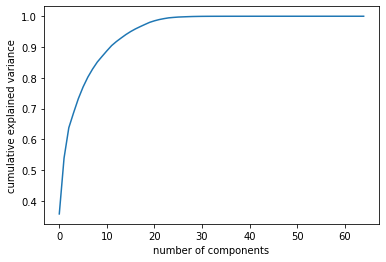

In [5]:
pca = PCA().fit(X) #entrenamiento del modelo
varExp = pca.explained_variance_ratio_ 
print(varExp.shape,'\n Explained variance',np.sum(varExp[:50]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Observacion
* El numero de dimensiones neserarias para lograr una varianza acumulada de los datos de aprox 95% es de 16. 

In [6]:
pca = PCA(16,svd_solver='randomized') # Version rapida para calculo de la matriz de covarianza (SVD), para grandes dimensiones.
pca.fit(X) #entrenamiento

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

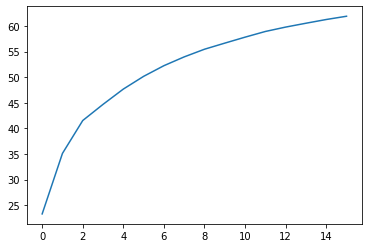

In [7]:
projected = pca.fit_transform(X)

plt.plot(np.cumsum(pca.explained_variance_))

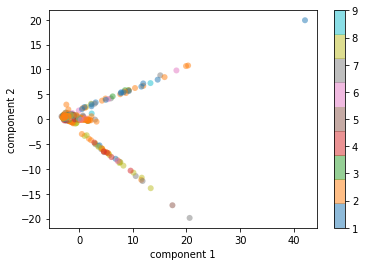

In [8]:

for i in range(400):
  if(Etiquetas[i]=="negativa"):
    Etiquetas[i]=1
  if(Etiquetas[i]=="neutral"):
    Etiquetas[i]=2
  if(Etiquetas[i]=="positiva"):
    Etiquetas[i]=3
  if(Etiquetas[i]=="Stress"):
    Etiquetas[i]=4
  if(Etiquetas[i]=="calm"):
    Etiquetas[i]=5
  if(Etiquetas[i]=="tristeza"):
    Etiquetas[i]=6
  if(Etiquetas[i]=="satisfecho"):
    Etiquetas[i]=7
  if(Etiquetas[i]=="tranquilid"):
    Etiquetas[i]=8
  if(Etiquetas[i]=="sorpresa"):
    Etiquetas[i]=9


plt.scatter(projected[:, 0], projected[:, 1], # grafica todos los puntos de la coordenada x ([:, 0]) y los puntos de la coordenada y
            c=Etiquetas, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 9)) # color map de 10 por q se que hay 10 clases
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

[0.35745625 0.5389492  0.63751958 0.68596929 0.73182334 0.76996594
 0.80195808 0.82834248 0.85129238 0.86957419 0.88749055 0.90453299
 0.91769225 0.92922909 0.94040873 0.95019334]


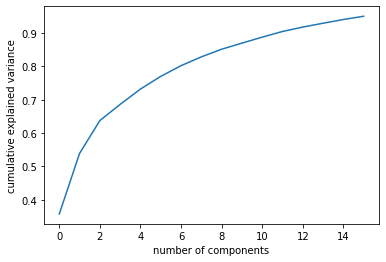

In [9]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
print(np.cumsum(pca.explained_variance_ratio_))

In [10]:
Etiquetas = dataset['EMOCIÓN'] #extracion de las etiquetas
Etiquetas = np.array(Etiquetas.values) #extracion de los valores de las etiquetas
datapca = pd.DataFrame(projected) #creacion del dataset para PCA
labels  = dataset['EMOCIÓN'] 
datapca['EMOCIÓN'] = Etiquetas


In [11]:
print(projected.shape)
Recovery = pca.inverse_transform(projected)
print(Recovery.shape)

print(X.shape)

(400, 16)
(400, 65)
(400, 65)


In [12]:
datapca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,EMOCIÓN
0,-2.323832,0.042259,-2.074261,0.029075,-0.193686,3.607803,-1.681205,-2.021966,-1.464487,0.110988,-0.830793,1.169527,-0.509235,3.645591,2.665385,0.079923,neutral
1,-0.892462,-0.607589,-0.471803,-0.607310,-3.051741,3.197655,1.965205,-2.076944,-0.603762,0.796331,0.599001,0.158623,1.184329,-1.911844,-1.033234,-0.206297,positiva
2,-1.585040,-0.222709,-1.151906,2.894310,-2.298952,1.868188,-0.498739,-1.983366,-0.382251,-1.390174,-1.470202,-0.955853,0.324119,-0.451674,-0.621734,-0.774013,neutral
3,-2.724015,0.021342,-0.712303,-0.771943,-1.098730,0.272598,0.519219,-1.096608,-0.046069,-0.587158,0.332503,0.031510,-0.936656,0.171955,0.421603,0.010535,neutral
4,-2.027683,-0.278589,-0.951709,-0.639203,-1.181512,1.443502,-1.399151,-1.475979,-0.231247,-0.033897,-0.445818,-0.480375,-0.381857,0.896343,0.599225,-0.195812,positiva
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-2.734264,0.321575,-0.246636,-0.020197,-0.515100,-2.016076,0.707447,-1.110749,0.148775,-0.995862,-0.026749,-0.656889,0.569178,0.471658,-0.671826,0.003448,neutral
396,-3.057694,0.305776,-0.654241,-0.093307,-0.133533,-1.241856,-0.421874,-0.077353,-0.524259,0.205801,1.429210,0.422864,-1.283929,-0.053986,0.065733,-0.842709,neutral
397,-2.480013,0.403156,0.037875,0.295337,-0.639331,-1.771690,0.107300,0.309124,-1.233209,0.475423,1.671518,0.639242,-0.823030,-0.004206,-1.261654,0.347465,neutral
398,-2.636443,0.415935,-0.022829,0.143714,-0.849503,-2.488619,1.276231,-0.848069,-0.755163,0.098333,1.780566,-0.198017,0.090335,-0.297746,-0.139826,-0.124194,neutral


## Observacion

se oserva que con PCA pasamos de tener una matriz de 400X65 a una de 400X17 conservando el 95% de varianza.

# **Modelos lineales de clasificacion Bayesiano y Regresion Logıstica**

## **Bayesiano**

In [13]:
# construimos el clasificador Bayesiano

# Se crea el modelo (ej. clasificador)
model = GaussianNB() # Verificar cuales son los parametros que tiene este clasificador.

# Se entrena el modelo
model.fit(XTrain,EtiquetasTrain)

# Se realiza una predicción de las etiquetas
yEstTrain = model.predict(XTrain)
yEstTest = model.predict(XTest)


print('Accuracy: ', accuracy_score(EtiquetasTrain,yEstTrain))
print('Confunsion Matrix (Train): \n', confusion_matrix(EtiquetasTrain,yEstTrain))

print('Accuracy: ', accuracy_score(EtiquetasTest,yEstTest))
print('Confunsion Matrix (Test): \n', confusion_matrix(EtiquetasTest,yEstTest))

accuracy = model.score(XTrain, EtiquetasTrain)
print("Train accuracy = ", accuracy * 100, "%")
accuracy = model.score(XTest, EtiquetasTest)
print("Test accuracy = ", accuracy * 100, "%")

Accuracy:  0.225
Confunsion Matrix (Train): 
 [[12  1  0  0  0  0  0  1  1]
 [ 1  2  0  0  0  0  4  1  2]
 [ 0  0  8  0  5  1  1  2  0]
 [10  2  9  8 30  2 38  3  2]
 [ 4  0  2  0  7  0  1  0  0]
 [ 6  4  1  2  6  2 24  0  3]
 [ 3  0  1  0  2  0 12  0  0]
 [ 5  3  0  0  1  1 13  8  1]
 [ 2  0  1  0  3  0 11  1  4]]
Accuracy:  0.03333333333333333
Confunsion Matrix (Test): 
 [[ 0  1  0  0  1  0  1  0  0]
 [ 0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  1  0  0]
 [ 5  6 23  1 13  3 17  0  0]
 [ 0  1  2  0  1  0  1  0  0]
 [ 0  2  2  0  7  1  5  0  1]
 [ 0  0  1  1  2  0  1  0  0]
 [ 0  0  0  0  5  0  3  0  0]
 [ 0  1  1  0  4  2  3  0  0]]
Train accuracy =  22.5 %
Test accuracy =  3.3333333333333335 %


## Observacion
* Al entrenar el modelo y aumentar en numero de observaciones con el modelo Bayesiano el accuracy de entrenamiento dacae bruscamente.

* El accuracy de entrenamiento es de 22.5%, mientras que el de validacion es del 3.33%, lo cual es muy bajo.

* En la matriz de confunsion podemos observar que la emocion 4 es donde se esta presentando una mayor cantidad de falsos negativos y/o falsos positivos.

## **Regresion logistica**

In [14]:
# construimos el clasificador de regresion logistica

# Se crea el modelo 
modelRL = LogisticRegression()

# Se entrena el modelo
modelRL.fit(XTrain,EtiquetasTrain)

# Se realiza una predicción
yEstTrain = modelRL.predict(XTrain)
yEstTest = modelRL.predict(XTest)

print('Accuracy: ', accuracy_score(EtiquetasTrain,yEstTrain))
print('Confunsion Matrix (Train): \n', confusion_matrix(EtiquetasTrain,yEstTrain))

print('Accuracy: ', accuracy_score(EtiquetasTest,yEstTest))
print('Confunsion Matrix (Test): \n', confusion_matrix(EtiquetasTest,yEstTest))


accuracy = modelRL.score(XTrain, EtiquetasTrain)
print("Train accuracy = ", accuracy * 100, "%")
accuracy = modelRL.score(XTest, EtiquetasTest)
print("Test accuracy = ", accuracy * 100, "%")

EtqTest = modelRL.predict(XTest)
cMAT = confusion_matrix(EtiquetasTest,EtqTest)

Accuracy:  0.5107142857142857
Confunsion Matrix (Train): 
 [[ 7  0  0  3  0  1  2  1  1]
 [ 0  2  0  2  0  3  0  2  1]
 [ 0  0  8  6  0  0  0  2  1]
 [ 4  1  3 83  0 10  0  3  0]
 [ 2  0  0  6  6  0  0  0  0]
 [ 3  0  0 23  1 15  1  2  3]
 [ 2  0  1  4  0  1  9  0  1]
 [ 0  1  0 18  0  3  0 10  0]
 [ 0  0  2 12  0  3  1  1  3]]
Accuracy:  0.2916666666666667
Confunsion Matrix (Test): 
 [[ 0  0  0  1  1  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0]
 [ 0  0  3 25  2 36  0  2  0]
 [ 0  0  0  0  1  4  0  0  0]
 [ 1  0  0  7  0  9  0  0  1]
 [ 0  0  1  0  1  3  0  0  0]
 [ 0  0  0  6  0  1  0  0  1]
 [ 0  0  0  4  0  4  0  3  0]]
Train accuracy =  51.07142857142857 %
Test accuracy =  29.166666666666668 %


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Observacion
* Al entrenar el modelo y aumentar en numero de observaciones con el modelo de regresion logistica el accuracy de entrenamiento dacae bruscamente sin embargo no es tan brusco como el bayesiano.

* El accuracy de entrenamiento es de 51.07%, mientras que el de validacion es del 29.16%, lo cual es un mejora enorme frente al modelo bayesiado ya que aumento el acuraccy al doble en el entrenamiento y aumento en un  factor de 9 aproximadamente el de entrenamiento.

* Podemos decir que el modelo de regresion logistica para nuestro caso es mejor debido a los valores del accuracy

* En la matriz de confunsion podemos observar que la emocion 4 sigue siendo la que presenta una mayor cantidad de falsos negativos y/o falsos positivos.

### **Utilizando la forma de particion de conjunto de entrenamiento y test aleatorio.**

Ahora vamos a separar los datos de entrenamiento y de validación de manera aleatoria y realizamos el mismo procedimiento.

## **Bayesiano**

In [15]:
X_Train, X_Test, Etiquetas_Train, Etiquetas_Test = train_test_split(X,Etiquetas,test_size = 0.2) 

# Se crea el modelo 
modelRL = GaussianNB()
# Se entrena el modelo
modelRL.fit(X_Train,Etiquetas_Train)
# Se realiza una predicción
yEstTrain=[]
yEstTest=[]
yEstTrain = modelRL.predict(X_Train)
yEstTest = modelRL.predict(X_Test)

print('Accuracy: ', accuracy_score(Etiquetas_Train,yEstTrain))
print('Confunsion Matrix (Train): \n', confusion_matrix(Etiquetas_Train,yEstTrain))

print('Accuracy: ', accuracy_score(Etiquetas_Test,yEstTest))
print('Confunsion Matrix (Test): \n', confusion_matrix(Etiquetas_Test,yEstTest))


accuracy = modelRL.score(X_Train, Etiquetas_Train)
print("Train accuracy = ", accuracy * 100, "%")
accuracy = modelRL.score(X_Test, Etiquetas_Test)
print("Test accuracy = ", accuracy * 100, "%")

EtqTest = modelRL.predict(X_Test)
cMAT = confusion_matrix(Etiquetas_Test,EtqTest)

Accuracy:  0.165625
Confunsion Matrix (Train): 
 [[ 1  0  0  0  1  0 10  2  0]
 [ 0  2  0  0  0  2  4  1  0]
 [ 0  0  8  0  2  0  2  2  0]
 [ 2  2  8  6 27  0 85  9  0]
 [ 0  0  2  0  4  0  8  0  0]
 [ 1  1  1  1  4  2 36  2  0]
 [ 0  0  0  0  1  0 18  0  0]
 [ 1  5  0  0  1  4 15 10  0]
 [ 2  1  1  1  2  0 18  0  2]]
Accuracy:  0.075
Confunsion Matrix (Test): 
 [[ 0  1  0  0  0  0  1  2  0]
 [ 0  0  0  0  0  0  2  0  0]
 [ 0  0  1  0  3  0  0  0  0]
 [ 0  1  2  0  8  1 19  2  0]
 [ 0  0  1  0  1  0  3  0  0]
 [ 0  2  1  0  1  1 12  1  0]
 [ 0  0  1  0  1  0  2  0  0]
 [ 0  0  0  0  1  0  2  1  0]
 [ 0  0  0  1  1  2  2  0  0]]
Train accuracy =  16.5625 %
Test accuracy =  7.5 %


## Observacion
* podemos oservar que con una separacion de datos de entrenamiento y de validacion aleatoria del 20% obtenemos un accuracy que varia entre 50% y 59% de entrenamiento y un acurracy que varia entre un 35% y 48%

## **Regresion logistica**

In [16]:
X_Train, X_Test, Etiquetas_Train, Etiquetas_Test = train_test_split(X,Etiquetas,test_size = 0.2) 

# Se crea el modelo 
modelRL = LogisticRegression()
# Se entrena el modelo
modelRL.fit(X_Train,Etiquetas_Train)
# Se realiza una predicción

yEstTrain = modelRL.predict(X_Train)
yEstTest = modelRL.predict(X_Test)

print('Accuracy: ', accuracy_score(Etiquetas_Train,yEstTrain))
print('Confunsion Matrix (Train): \n', confusion_matrix(Etiquetas_Train,yEstTrain))

print('Accuracy: ', accuracy_score(Etiquetas_Test,yEstTest))
print('Confunsion Matrix (Test): \n', confusion_matrix(Etiquetas_Test,yEstTest))


accuracy = modelRL.score(X_Train, Etiquetas_Train)
print("Train accuracy = ", accuracy * 100, "%")
accuracy = modelRL.score(X_Test, Etiquetas_Test)
print("Test accuracy = ", accuracy * 100, "%")

EtqTest = modelRL.predict(X_Test)
cMAT = confusion_matrix(Etiquetas_Test,EtqTest)

Accuracy:  0.565625
Confunsion Matrix (Train): 
 [[  7   0   0   1   0   2   0   0   0]
 [  0   3   0   4   0   1   0   0   0]
 [  0   0   5   7   0   0   0   1   1]
 [  1   0   3 118   0   9   2   2   4]
 [  0   0   1   9   5   0   1   0   0]
 [  1   0   0  32   1  16   2   0   1]
 [  1   0   1   7   1   0   9   0   1]
 [  0   0   0  16   0   0   0  11   3]
 [  0   0   1  13   0   5   1   3   7]]
Accuracy:  0.375
Confunsion Matrix (Test): 
 [[ 0  0  0  4  0  3  1  0  0]
 [ 0  0  0  1  0  0  0  1  1]
 [ 0  0  0  2  0  1  1  0  0]
 [ 0  1  0 29  0  1  0  2  0]
 [ 0  0  0  3  0  0  0  0  0]
 [ 0  3  0 10  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  1]
 [ 0  1  0  7  0  1  0  1  0]
 [ 0  0  0  3  0  0  0  0  0]]
Train accuracy =  56.56250000000001 %
Test accuracy =  37.5 %


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Observacion

* Aquí se presenta un fenomeno curioso y es que al ejecutalo la primera vez obtenemos un accuracy de entrenamiento del 50% sin embargo al ejecutarlo una segunda vez pasa a ser un 98% y si se ejecuta varias veces mantiene en promedio ese 98%

### **Utilizando la forma de particion de conjunto de entrenamiento y test aleatorio y PCA.**

Ahora se procede a realizar el entrenamiento con los datos generados al usar el modelo PCA para comparar si al pasar a un espacio latente de menor dimensionalidad que el problema original se pierde o se disminuye la certeza en los modelos de clasificación probabilísticos.

Volvemos a separar los sujetos pero ahora en el espacio latente.

In [17]:
XPCA0 = projected[:40]
XPCA1 = projected[40:80]
XPCA2 = projected[80:120]
XPCA3 = projected[120:160]
XPCA4 = projected[160:200]
XPCA5 = projected[200:240]
XPCA6 = projected[240:280]
XPCA7 = projected[280:320]
XPCA8 = projected[320:360]
XPCA9 = projected[360:400]

w = np.concatenate((XPCA0,XPCA2,XPCA3,XPCA4,XPCA5,XPCA8,XPCA9), axis = 0)  
x = np.concatenate((XPCA1,XPCA6,XPCA7), axis = 0)  

XTrainPCA = w
XTestPCA = x

## **Bayesiano**

In [18]:
# construimos el clasificador Bayesiano

# Se crea el modelo
model = GaussianNB() # Verificar cuales son los parametros que tiene este clasificador.

# Se entrena el modelo
model.fit(XTrainPCA,EtiquetasTrain)

# Se realiza una predicción de las etiquetas
yEstTrain = model.predict(XTrainPCA)
yEstTest = model.predict(XTestPCA)

print('Accuracy: ', accuracy_score(EtiquetasTrain,yEstTrain))
print('Confunsion Matrix (Train): \n', confusion_matrix(EtiquetasTrain,yEstTrain))

print('Accuracy: ', accuracy_score(EtiquetasTest,yEstTest))
print('Confunsion Matrix (Test): \n', confusion_matrix(EtiquetasTest,yEstTest))

accuracy = model.score(XTrainPCA, EtiquetasTrain)
print("Train accuracy = ", accuracy * 100, "%")
accuracy = model.score(XTestPCA, EtiquetasTest)
print("Test accuracy = ", accuracy * 100, "%")

Accuracy:  0.35714285714285715
Confunsion Matrix (Train): 
 [[ 8  0  1  1  0  0  0  4  1]
 [ 0  3  0  1  0  3  0  2  1]
 [ 0  0 14  0  0  2  0  1  0]
 [10  1 14 37  5  5  5 15 12]
 [ 3  0  3  4  4  0  0  0  0]
 [ 6  3  3  6  4  9  2  4 11]
 [ 4  0  1  4  0  0  7  1  1]
 [ 3  2  6  9  0  0  1  8  3]
 [ 2  0  5  0  1  2  1  1 10]]
Accuracy:  0.075
Confunsion Matrix (Test): 
 [[ 0  1  0  2  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0]
 [ 0 28 10  8  1  9  0  2 10]
 [ 0  3  1  1  0  0  0  0  0]
 [ 0  4  1  1  1  1  0  2  8]
 [ 0  1  1  2  0  1  0  0  0]
 [ 0  0  2  1  1  1  1  0  2]
 [ 0  2  3  2  0  4  0  0  0]]
Train accuracy =  35.714285714285715 %
Test accuracy =  7.5 %


## Observacion

* con el modelo bayesiano obtenemos un accuracy de entrenamiento del 35.7% y 7.5% de validación.

* Comparando los valores del accuracy para el problema origianl y el problema en PCA, se observa una mejora, ya que pasamos de 22.5% a 35.7% en entrenamiento y de 3.33% a un 7.5% de validación. 

*  Tanto en PCA como en el original vemos que la emocion 4 en la matriz de confunsion es la que más falsos negativos y/o falsos positivos arroja.

## **Regresion Logistica**

In [19]:
# construimos el clasificador de regresion logistica

# Se crea el modelo 
modelRL = LogisticRegression()

# Se entrena el modelo
modelRL.fit(XTrainPCA,EtiquetasTrain)

# Se realiza una predicción de las etiquetas
yEstTrain = modelRL.predict(XTrainPCA)
yEstTest = modelRL.predict(XTestPCA)

print('Accuracy: ', accuracy_score(EtiquetasTrain,yEstTrain))
print('Confunsion Matrix (Train): \n', confusion_matrix(EtiquetasTrain,yEstTrain))

print('Accuracy: ', accuracy_score(EtiquetasTest,yEstTest))
print('Confunsion Matrix (Test): \n', confusion_matrix(EtiquetasTest,yEstTest))

accuracy = modelRL.score(XTrainPCA, EtiquetasTrain)
print("Train accuracy = ", accuracy * 100, "%")
accuracy = modelRL.score(XTestPCA, EtiquetasTest)
print("Test accuracy = ", accuracy * 100, "%")



Accuracy:  0.45357142857142857
Confunsion Matrix (Train): 
 [[ 3  0  0  4  1  3  2  2  0]
 [ 0  1  0  4  0  3  0  1  1]
 [ 0  0  9  7  0  0  0  1  0]
 [ 2  1  2 81  0 12  2  3  1]
 [ 2  0  1  8  2  1  0  0  0]
 [ 1  0  0 22  2 15  2  3  3]
 [ 2  0  1  7  0  1  6  0  1]
 [ 0  0  0 20  0  2  0  9  1]
 [ 1  0  2 13  0  4  0  1  1]]
Accuracy:  0.2916666666666667
Confunsion Matrix (Test): 
 [[ 0  0  0  0  1  1  0  1  0]
 [ 0  0  0  1  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0]
 [ 0  1  3 28  2  7  0 26  1]
 [ 0  0  0  1  1  0  0  3  0]
 [ 0  1  0  8  0  6  0  1  2]
 [ 0  0  2  1  1  0  0  1  0]
 [ 0  0  2  5  0  0  0  0  1]
 [ 0  0  0  7  0  2  0  2  0]]
Train accuracy =  45.357142857142854 %
Test accuracy =  29.166666666666668 %


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Observacion

* con el modelo de regresion logistico obtenemos un accuracy de entrenamiento del 45.0% y 29.16% de validación.

* Comparando los valores del accuracy para el problema origianl y el problema en PCA, se observa que en PCA tenemos una reduccion en el accuracy de entrenamiento pero se mantiene en el de validación.

*  Tanto en PCA como en el original vemos que la emocion 4 en la matriz de confunsion es la que más falsos negativos y/o falsos positivos arroja.

### **Ahora con el SPLIT aleatorio y PCA**

## **Bayesiano con PCA**

In [20]:
X_TrainPCA, X_TestPCA, Etiquetas_TrainPCA, Etiquetas_TestPCA = train_test_split(projected,Etiquetas,test_size = 0.2) 

# Se crea el modelo
model = GaussianNB() # Verificar cuales son los parametros que tiene este clasificador.

# Se entrena el modelo
model.fit(X_TrainPCA,Etiquetas_TrainPCA)

# Se realiza una predicción de las etiquetas
yEstTrain = model.predict(X_TrainPCA)
yEstTest = model.predict(X_TestPCA)

print('Accuracy: ', accuracy_score(Etiquetas_TrainPCA,yEstTrain))
print('Confunsion Matrix (Train): \n', confusion_matrix(Etiquetas_TrainPCA,yEstTrain))

print('Accuracy: ', accuracy_score(Etiquetas_TestPCA,yEstTest))
print('Confunsion Matrix (Test): \n', confusion_matrix(Etiquetas_TestPCA,yEstTest))

accuracy = model.score(X_TrainPCA, Etiquetas_TrainPCA)
print("Train accuracy = ", accuracy * 100, "%")
accuracy = model.score(X_TestPCA, Etiquetas_TestPCA)
print("Test accuracy = ", accuracy * 100, "%")

Accuracy:  0.325
Confunsion Matrix (Train): 
 [[ 2  2  1  0  1  1  2  3  2]
 [ 0  5  0  2  0  2  0  1  0]
 [ 0  0 11  0  0  1  0  1  0]
 [ 3  7 12 39  6  8 10 37 13]
 [ 2  0  3  3  5  0  4  1  0]
 [ 4  3  4  5  2 12  4  9 10]
 [ 0  0  2  1  2  2 12  0  0]
 [ 1  3  7  4  1  0  2 11  4]
 [ 2  0  4  3  0  4  0  5  7]]
Accuracy:  0.1875
Confunsion Matrix (Test): 
 [[ 1  0  0  0  0  0  2  1  0]
 [ 0  0  0  0  0  0  1  0  0]
 [ 0  1  2  0  0  1  0  1  0]
 [ 1  3  5  9  1  0  3 13  2]
 [ 0  0  1  0  0  0  0  0  0]
 [ 1  4  0  1  0  2  0  2  3]
 [ 1  1  0  1  1  0  0  0  0]
 [ 0  2  2  0  0  0  1  1  1]
 [ 2  0  2  1  0  1  1  1  0]]
Train accuracy =  32.5 %
Test accuracy =  18.75 %


## Observacion

* Podemos oservar que con una separacion de datos de entrenamiento y de validacion aleatoria del 20% obtenemos un accuracy que varia entre 50% y 59% de entrenamiento y un acurracy que varia entre un 35% y 48%, por lo tanto no hay una mejora significatva entre el modelo de clasificacion bayesiano sin PCA y con PCA.



## **Regresion logistica con PCA**

In [21]:
X_TrainPCA, X_TestPCA, Etiquetas_TrainPCA, Etiquetas_TestPCA = train_test_split(projected,Etiquetas,test_size = 0.2) 

# Se crea el modelo
model = LogisticRegression() # Verificar cuales son los parametros que tiene este clasificador.

# Se entrena el modelo
model.fit(X_TrainPCA,Etiquetas_TrainPCA)

# Se realiza una predicción de las etiquetas
yEstTrain = model.predict(X_TrainPCA)
yEstTest = model.predict(X_TestPCA)

print('Accuracy: ', accuracy_score(Etiquetas_TrainPCA,yEstTrain))
print('Confunsion Matrix (Train): \n', confusion_matrix(Etiquetas_TrainPCA,yEstTrain))

print('Accuracy: ', accuracy_score(Etiquetas_TestPCA,yEstTest))
print('Confunsion Matrix (Test): \n', confusion_matrix(Etiquetas_TestPCA,yEstTest))

accuracy = model.score(X_TrainPCA, Etiquetas_TrainPCA)
print("Train accuracy = ", accuracy * 100, "%")
accuracy = model.score(X_TestPCA, Etiquetas_TestPCA)
print("Test accuracy = ", accuracy * 100, "%")

Accuracy:  0.475
Confunsion Matrix (Train): 
 [[  2   0   0   4   0   4   3   1   0]
 [  0   0   0   5   0   3   0   1   1]
 [  0   0   6   7   0   0   0   1   0]
 [  2   1   2 120   1   9   2   4   1]
 [  0   0   1  12   0   0   2   0   0]
 [  2   0   1  30   0   6   2   5   1]
 [  1   0   1  10   0   0   7   0   0]
 [  1   0   0  20   0   0   0   9   1]
 [  0   0   1  20   0   3   0   2   2]]
Accuracy:  0.3875
Confunsion Matrix (Test): 
 [[ 0  0  0  1  1  0  1  1  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  1  2  0  0  0  1  0]
 [ 0  1  0 26  0  0  1  2  0]
 [ 0  0  0  2  1  0  1  0  0]
 [ 0  1  0 14  0  2  1  0  1]
 [ 0  0  0  4  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  1  0]
 [ 0  0  0  3  0  1  1  0  0]]
Train accuracy =  47.5 %
Test accuracy =  38.75 %


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Observacion

* nuevamente se evidencia el mismo fenomeno, donde al ejecutar la primera vez obetenemos un accuracy del 50% y luego obtenemos valores de mas de 97%.

## 2. **Base de datos de rostros**

In [22]:
faces = fetch_lfw_people(min_faces_per_person=60)
X = faces.data
Etiquetas = faces.target
print(faces.target_names)
print(faces.images.shape)


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


(1348,) 
 Explained variance 0.950246


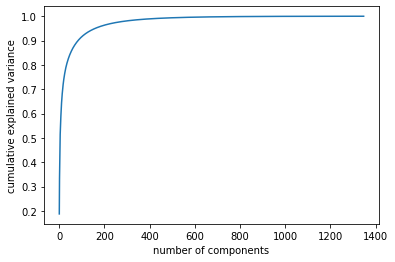

In [23]:
pca = PCA().fit(X) 
varExp = pca.explained_variance_ratio_
print(varExp.shape,'\n Explained variance',np.sum(varExp[:160]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Observacion
* El numero de dimensiones neserarias para lograr una varianza acumulada de los datos de aprox 95% es de 160. 

In [24]:
pca = PCA(160,svd_solver='randomized') # Version rapida para calculo de la matriz de covarianza (SVD), para grandes dimensiones.
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=160, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

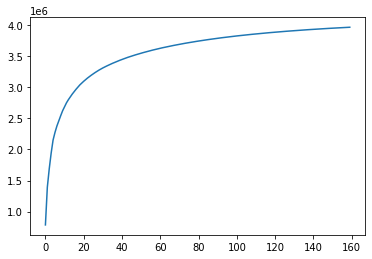

In [25]:
projected = pca.fit_transform(X)
plt.plot(np.cumsum(pca.explained_variance_))

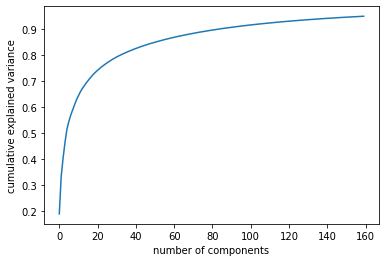

In [26]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

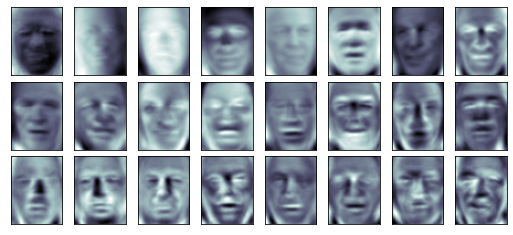

In [27]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

## Observacion

* se evidencia al visualizar las componentes principales de los rosotros que hay ciertos rasgos más importantes que otros, en general suele ser la iluminacion, la boca, la nariz y los ojos, ademas de que estos cambian segun su expresión, angulo e iluminación.

In [28]:
components = pca.transform(X)
projected = pca.inverse_transform(components)

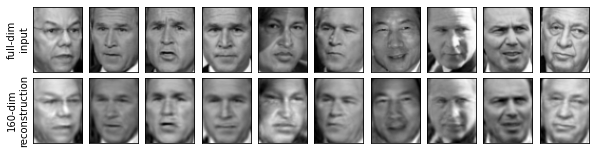

In [29]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('160-dim\nreconstruction');

## Observacion

* al reonstruir las caras utilizando los 160 componentes vemos que se ha perdido definicion en la imagen y se ven un poco más borrosas.

## **Bayesiano**

In [30]:
X_Train, X_Test, Etiquetas_Train, Etiquetas_Test = train_test_split(projected,Etiquetas,test_size = 0.2) 

# Se crea el modelo 
model = GaussianNB() # Verificar cuales son los parametros que tiene este clasificador.
# Se entrena el modelo
model.fit(X_Train,Etiquetas_Train)
# Se realiza una predicción de las etiquetas
yEst = model.predict(X_Test)


print('Accuracy (Test): ', accuracy_score(Etiquetas_Test,yEst))
print('Confunsion Matrix (Test): \n', confusion_matrix(Etiquetas_Test,yEst))

accuracy = model.score(X_Train, Etiquetas_Train)
print("Train accuracy = ", accuracy * 100, "%")
accuracy = model.score(X_Test, Etiquetas_Test)
print("Test accuracy = ", accuracy * 100, "%")

Accuracy (Test):  0.43333333333333335
Confunsion Matrix (Test): 
 [[ 3  5  1  1  0  2  0  3]
 [ 8 27  3  4  0  4  2  5]
 [ 2  3 12  3  2  1  0  0]
 [ 2  6  5 40  6 17 11 12]
 [ 1  0  1  2  6  4  2  7]
 [ 0  3  0  2  0  8  1  3]
 [ 0  0  0  1  0  2  6  1]
 [ 3  5  1  2  1  2  1 15]]
Train accuracy =  49.35064935064935 %
Test accuracy =  43.333333333333336 %


## Observacion

* Del modelo bayesiano obtenemos un accuracy entre 43% al 54% de entrenamiento y un accuracy de validacion en un rango similar, sin embargo siempre nos arroja un acurracy de validacion menor que el de entrenamiento.

## **Regresin logistica**

In [31]:
X_Train, X_Test, Etiquetas_Train, Etiquetas_Test = train_test_split(projected,Etiquetas,test_size = 0.2) 

# Se crea el modelo 
modelRL = LogisticRegression()
# Se entrena el modelo
modelRL.fit(X_Train, Etiquetas_Train)
# Se realiza una predicción
yEst = modelRL.predict(X_Test)

print('Accuracy (Test): ', accuracy_score(Etiquetas_Test,yEst))
print('Confunsion Matrix (Train): \n', confusion_matrix(Etiquetas_Test,yEst))

EtqTest = modelRL.predict(X_Test)
cMAT = confusion_matrix(Etiquetas_Test,EtqTest)
cMAT.view()

accuracy = modelRL.score(X_Train, Etiquetas_Train)
print("Train accuracy = ", accuracy * 100, "%")
accuracy = modelRL.score(X_Test, Etiquetas_Test)
print("Test accuracy = ", accuracy * 100, "%")

print('ACC test: ',accuracy_score(Etiquetas_Test,EtqTest))

Accuracy (Test):  0.8074074074074075
Confunsion Matrix (Train): 
 [[12  2  0  0  0  1  0  0]
 [ 2 34  1  3  0  1  0  3]
 [ 1  2 22  2  2  0  0  2]
 [ 0  5  4 91  2  1  2  3]
 [ 1  0  1  2 15  0  0  0]
 [ 0  1  0  1  1 14  0  0]
 [ 0  0  0  0  0  1 11  0]
 [ 0  0  0  2  3  0  0 19]]
Train accuracy =  97.30983302411875 %
Test accuracy =  80.74074074074075 %
ACC test:  0.8074074074074075


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Observacion

* Del modelo de regresion lineal obtenemos un accuracy entre 96%-97% de entrenamiento y un accuracy de validacion en un rango entre 79%-84%.

## conclusiones

* El mejor modelo para las dos aplicaciones que tuvimos fue el de regresion logisitica.

* PCA esmuy util que podemos reducir significativamente la cantidad de caracteristicas en una base de datos sin perder demasiada información.

* la clasificacion de un conjunto de datos con PCA y sin PCA serán muy similares en tanto que la desviacion explicada no baje demasiado al reducir la cantidad de dimensiones, en nuestro caso no dejamos que la desviacion explicada bajara del 95%

* Para realizar el proceso de clasificacion con los modelos bayesiano y de regresion logistica es mejor usar PCA ya que con este nos arroja valores exactitud más altos.

* Los valores de exactitud tanto de entrenamiento como de validacion para el sistema de análisis de señales fisiológicas en el contexto emocional son muy bajos, esto se debe a que aún falta mucha investigación en este campo ya que es un area muy verde del analisis de datos.

* La clasificacion de emociones no fue muy buena, sin embargo no es un problema de los modelos, más bien parece ser un problema de investigación en el cual se debe estudiar un poco más el como poder, apartir de las señales fisiologicas, determinar que emocion esta sintiendo el sujeto en cuestion. 